In [633]:
import datetime as dt
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import time, timedelta
import squarify
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# About the unicorn companies
Uciron companies 1 milyar dolar değerlemeyi aşan yatırım şirketleridir. Bu şirketlerin unicorn olarak adlandırılmasının temel nedeni ise;  CB Insight'a göre 2024 yılı itibari ile 1400 adet unicorn company bulunmaktadır. Bu sayı toplam şirketlerin yaklaşık %1’ine gelerek nadir bir grubu oluşturduğu için unicorn olarak adlandırılmıştır. Bu isim Ailien lee tarafından literatüre eklenmiştir. Genellikle teknoloji şirketlerini adlandırmak için kullanılır.  CB Insight'a göre 2024 yılı itibari ile 1400 adet unicorn company bulunmaktadır.Unicorn companies özellikle yüksek riske sahip şirketlerdir. Şirket sahipleri uzun bir dönemce kar elde edemeyebilir veya ciddi kazançlar elde ederek unicorn statüsünü kazanabilir.Unicorn şirketlerinin her birisinin misyon ve vizyon açısından farklılıklar olmasına rağmen belirli ortak özellikleri bulunmaktadır.Bunlar, Globalization, çok uluslu olmak, Müşterilerin ihtiyaçlarını anlamak, yıkıcı yenilik, 

## Özellikleri
Yüksek değer
Rapid growth
İnovasyon
## Unicorn olmalarındaki itici güç
Investor reputation
Economic cluster
Growth strategy

In [978]:
DF = pd.read_csv(r'd:\Users\Pc\Desktop\01__Unicorn_Companies.csv')

In [937]:
DF.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [979]:
DF['Industry'] = DF['Industry'].str.lower().replace({
    'artificial intelligence': 'Artificial Intelligence'})

In [917]:
DF.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [980]:
DF = DF.dropna().reset_index()

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1057 non-null   int64 
 1   Company           1057 non-null   object
 2   Valuation         1057 non-null   object
 3   Date Joined       1057 non-null   object
 4   Industry          1057 non-null   object
 5   City              1057 non-null   object
 6   Country/Region    1057 non-null   object
 7   Continent         1057 non-null   object
 8   Year Founded      1057 non-null   int64 
 9   Funding           1057 non-null   object
 10  Select Investors  1057 non-null   object
dtypes: int64(2), object(9)
memory usage: 91.0+ KB


In [940]:
DF['Date Joined'] = pd.to_datetime(DF['Date Joined'])
DF['Year Founded'] = pd.to_datetime(DF['Year Founded'])
DF['Date Joined_year'] = DF['Date Joined'].dt.year

In [7]:
DF.duplicated().sum()

0

In [981]:
DF['Valuation2'] = DF['Valuation'].str.strip('$B')
DF['Valuation2'] = DF['Valuation2'].astype(float)
DF['Valuation2'] = DF['Valuation2'] * 1000000000


In [5]:
def readable_numbers(x):
    """
    takes a large number and formats it into K,M to make it more readable
    """
    if x >= 1e9:
        s = '${:1.0f}B'.format(x*1e-9)
    else:
        s = '${:1.0f}M'.format(x*1e-6)
    return s

# Use the readable_numbers() function to create a new column
DF['Valuation3'] = DF['Valuation2'].apply(readable_numbers)


In [10]:
#bunun için farklı düzenleme yapacağım
DF['Valuation3'] = DF['Funding2'].apply(readable_numbers)

KeyError: 'Funding2'

In [985]:
DF = DF[DF['Funding'] != 'Unknown']
DF = DF[DF['Funding2'] > 0 ]

In [984]:
DF['Funding2'] = DF['Funding'].str.strip('$BM')
DF['Funding2'] = DF['Funding2'].astype(float)
DF['Funding2'] = DF['Funding2'] * 1000000000

In [274]:
# bunu df veri setinde yapacğaız çünkü bozuk çıkıyor
DF['num_investors2'] = DF['Select Investors'].str.count(',') + 1

In [11]:
DF[['Valuation2', 'Funding2']].describe()

,Valuation2,Funding2
count,1.062000e+03,1.062000e+03
mean,3.478343e+09,3.380913e+11
std,8.591965e+09,2.373331e+11
min,1.000000e+09,0.000000e+00
25%,1.000000e+09,1.660000e+11
50%,2.000000e+09,3.000000e+11
75%,3.000000e+09,4.915000e+11
max,1.800000e+11,9.990000e+11


C:\Users\Pc\AppData\Local\Temp\ipykernel_2800\1445709997.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


[Text(-200000000000.0, 0, '$-200000M'),
 Text(0.0, 0, '$0M'),
 Text(200000000000.0, 0, '$200B'),
 Text(400000000000.0, 0, '$400B'),
 Text(600000000000.0, 0, '$600B'),
 Text(800000000000.0, 0, '$800B'),
 Text(1000000000000.0, 0, '$1000B'),
 Text(1200000000000.0, 0, '$1200B')]

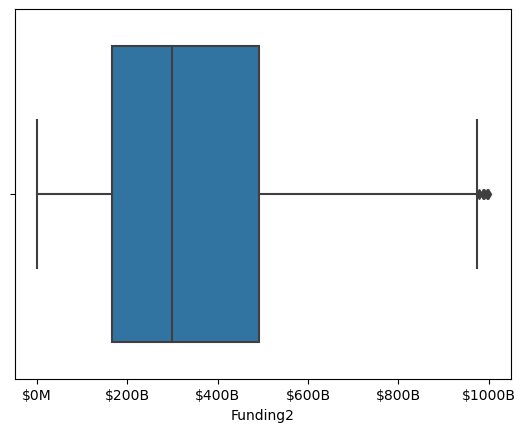

In [15]:

box = sns.boxplot(x = DF['Funding2'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))

C:\Users\Pc\AppData\Local\Temp\ipykernel_2800\3035084057.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


[Text(-25000000000.0, 0, '$-25000M'),
 Text(0.0, 0, '$0M'),
 Text(25000000000.0, 0, '$25B'),
 Text(50000000000.0, 0, '$50B'),
 Text(75000000000.0, 0, '$75B'),
 Text(100000000000.0, 0, '$100B'),
 Text(125000000000.0, 0, '$125B'),
 Text(150000000000.0, 0, '$150B'),
 Text(175000000000.0, 0, '$175B'),
 Text(200000000000.0, 0, '$200B')]

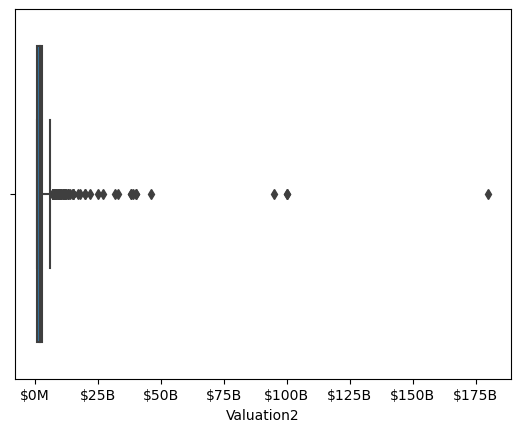

In [16]:
box = sns.boxplot(x = DF['Valuation2'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))

# Exploratory Data Analysis

Text(0, 0.5, 'Value counts of the Industry')

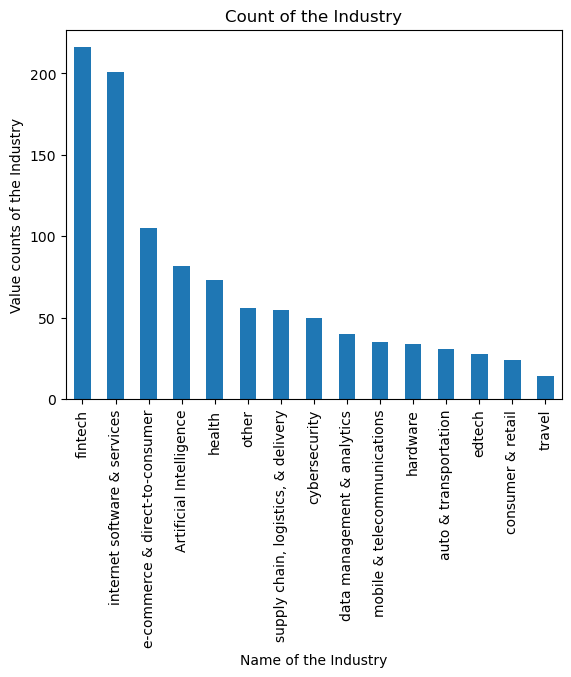

In [14]:
DF['Industry'].value_counts() \
.plot(kind='bar')
plt.title("Count of the Industry")
plt.xlabel("Name of the Industry")
plt.ylabel("Value counts of the Industry")


C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc\AppData\Local\Temp\ipykernel_4904\2538341969.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


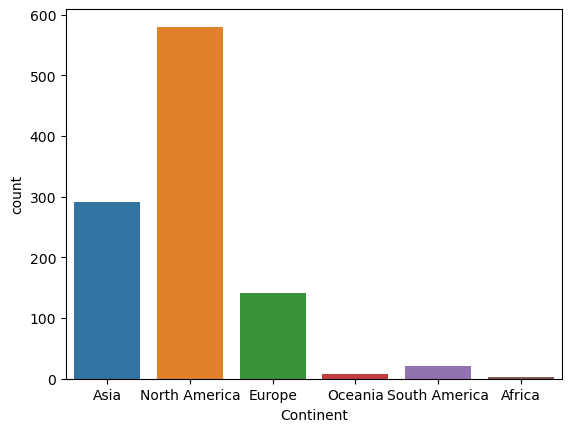

In [15]:
fig, ax =plt.subplots()
sns.countplot(DF['Continent'], ax=ax)
fig.show()


In [31]:
Valuation_by_continent = DF[['Continent', 'Valuation2']].groupby('Continent').sum().reset_index()
Valuation_by_continent

,Continent,Valuation2
0,Africa,5.000000e+09
1,Asia,1.037000e+12
2,Europe,4.980000e+11
3,North America,1.987000e+12
4,Oceania,5.600000e+10
5,South America,4.800000e+10


C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


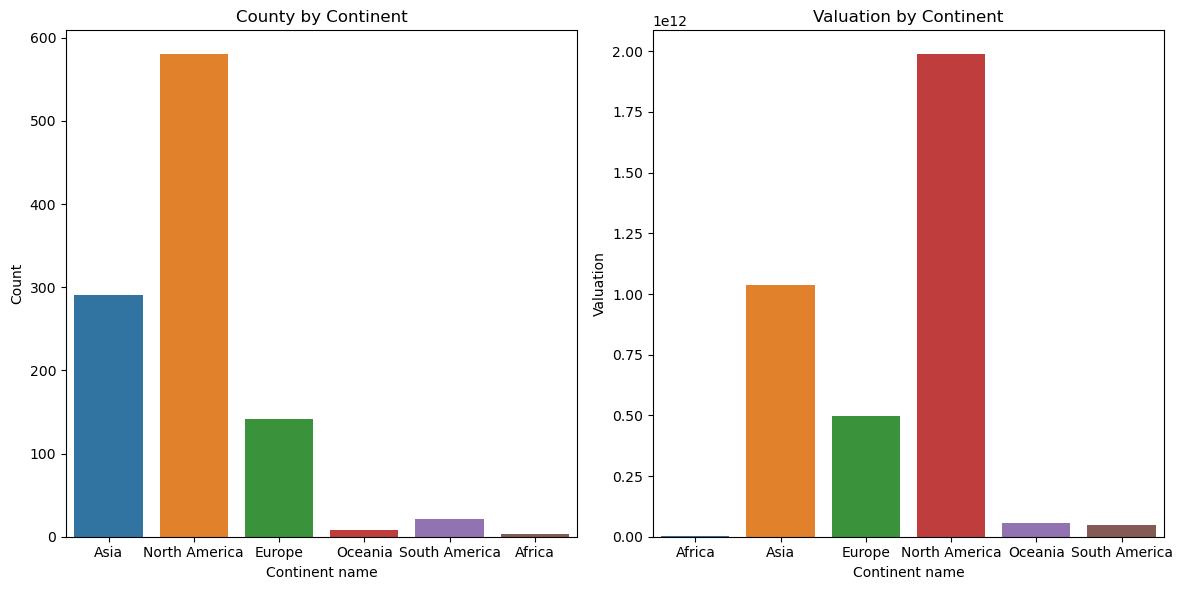

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(DF['Continent'], label='sin(x)', ax = ax1)
ax1.set_title('County by Continent')
ax1.set_xlabel('Continent name')
ax1.set_ylabel('Count')



sns.barplot(Valuation_by_continent['Continent'], Valuation_by_continent['Valuation2'], label='cos(x)', ax = ax2)
ax2.set_title('Valuation by Continent')
ax2.set_xlabel('Continent name')
ax2.set_ylabel('Valuation')

plt.tight_layout() 
plt.show()

# Unirocn şirketlerinin abd'de daha fazla olmasının sebebi ise şirketlere sunulan imkanların daha kolay kurulmasına olanak sağlayan krediler vs..

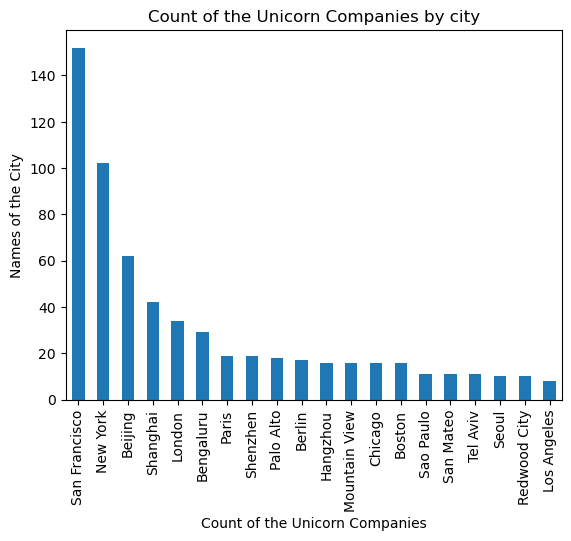

In [23]:
DF['City'].value_counts() \
.head(20) \
.plot(kind='bar')
plt.title("Count of the Unicorn Companies by city")
plt.xlabel("Count of the Unicorn Companies")
plt.ylabel("Names of the City")


# Bivariate analysis 

In [133]:
correlation = DF['num_investors2'].corr(DF['Valuation2'])
print(f"Correlation between number of investors and valuation: {correlation}")

Correlation between number of investors and valuation: 0.06640593252021254


<AxesSubplot:xlabel='City'>

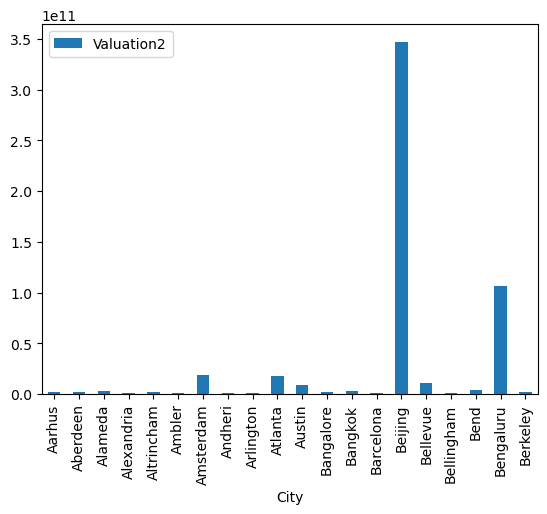

In [133]:
DF[['City', 'Valuation2']].groupby('City').sum() \
.head(20) \
.plot(kind ='bar')

In [42]:
Valuation_by_Industry = DF[['Industry', 'Valuation2']].groupby('Industry').sum().reset_index()

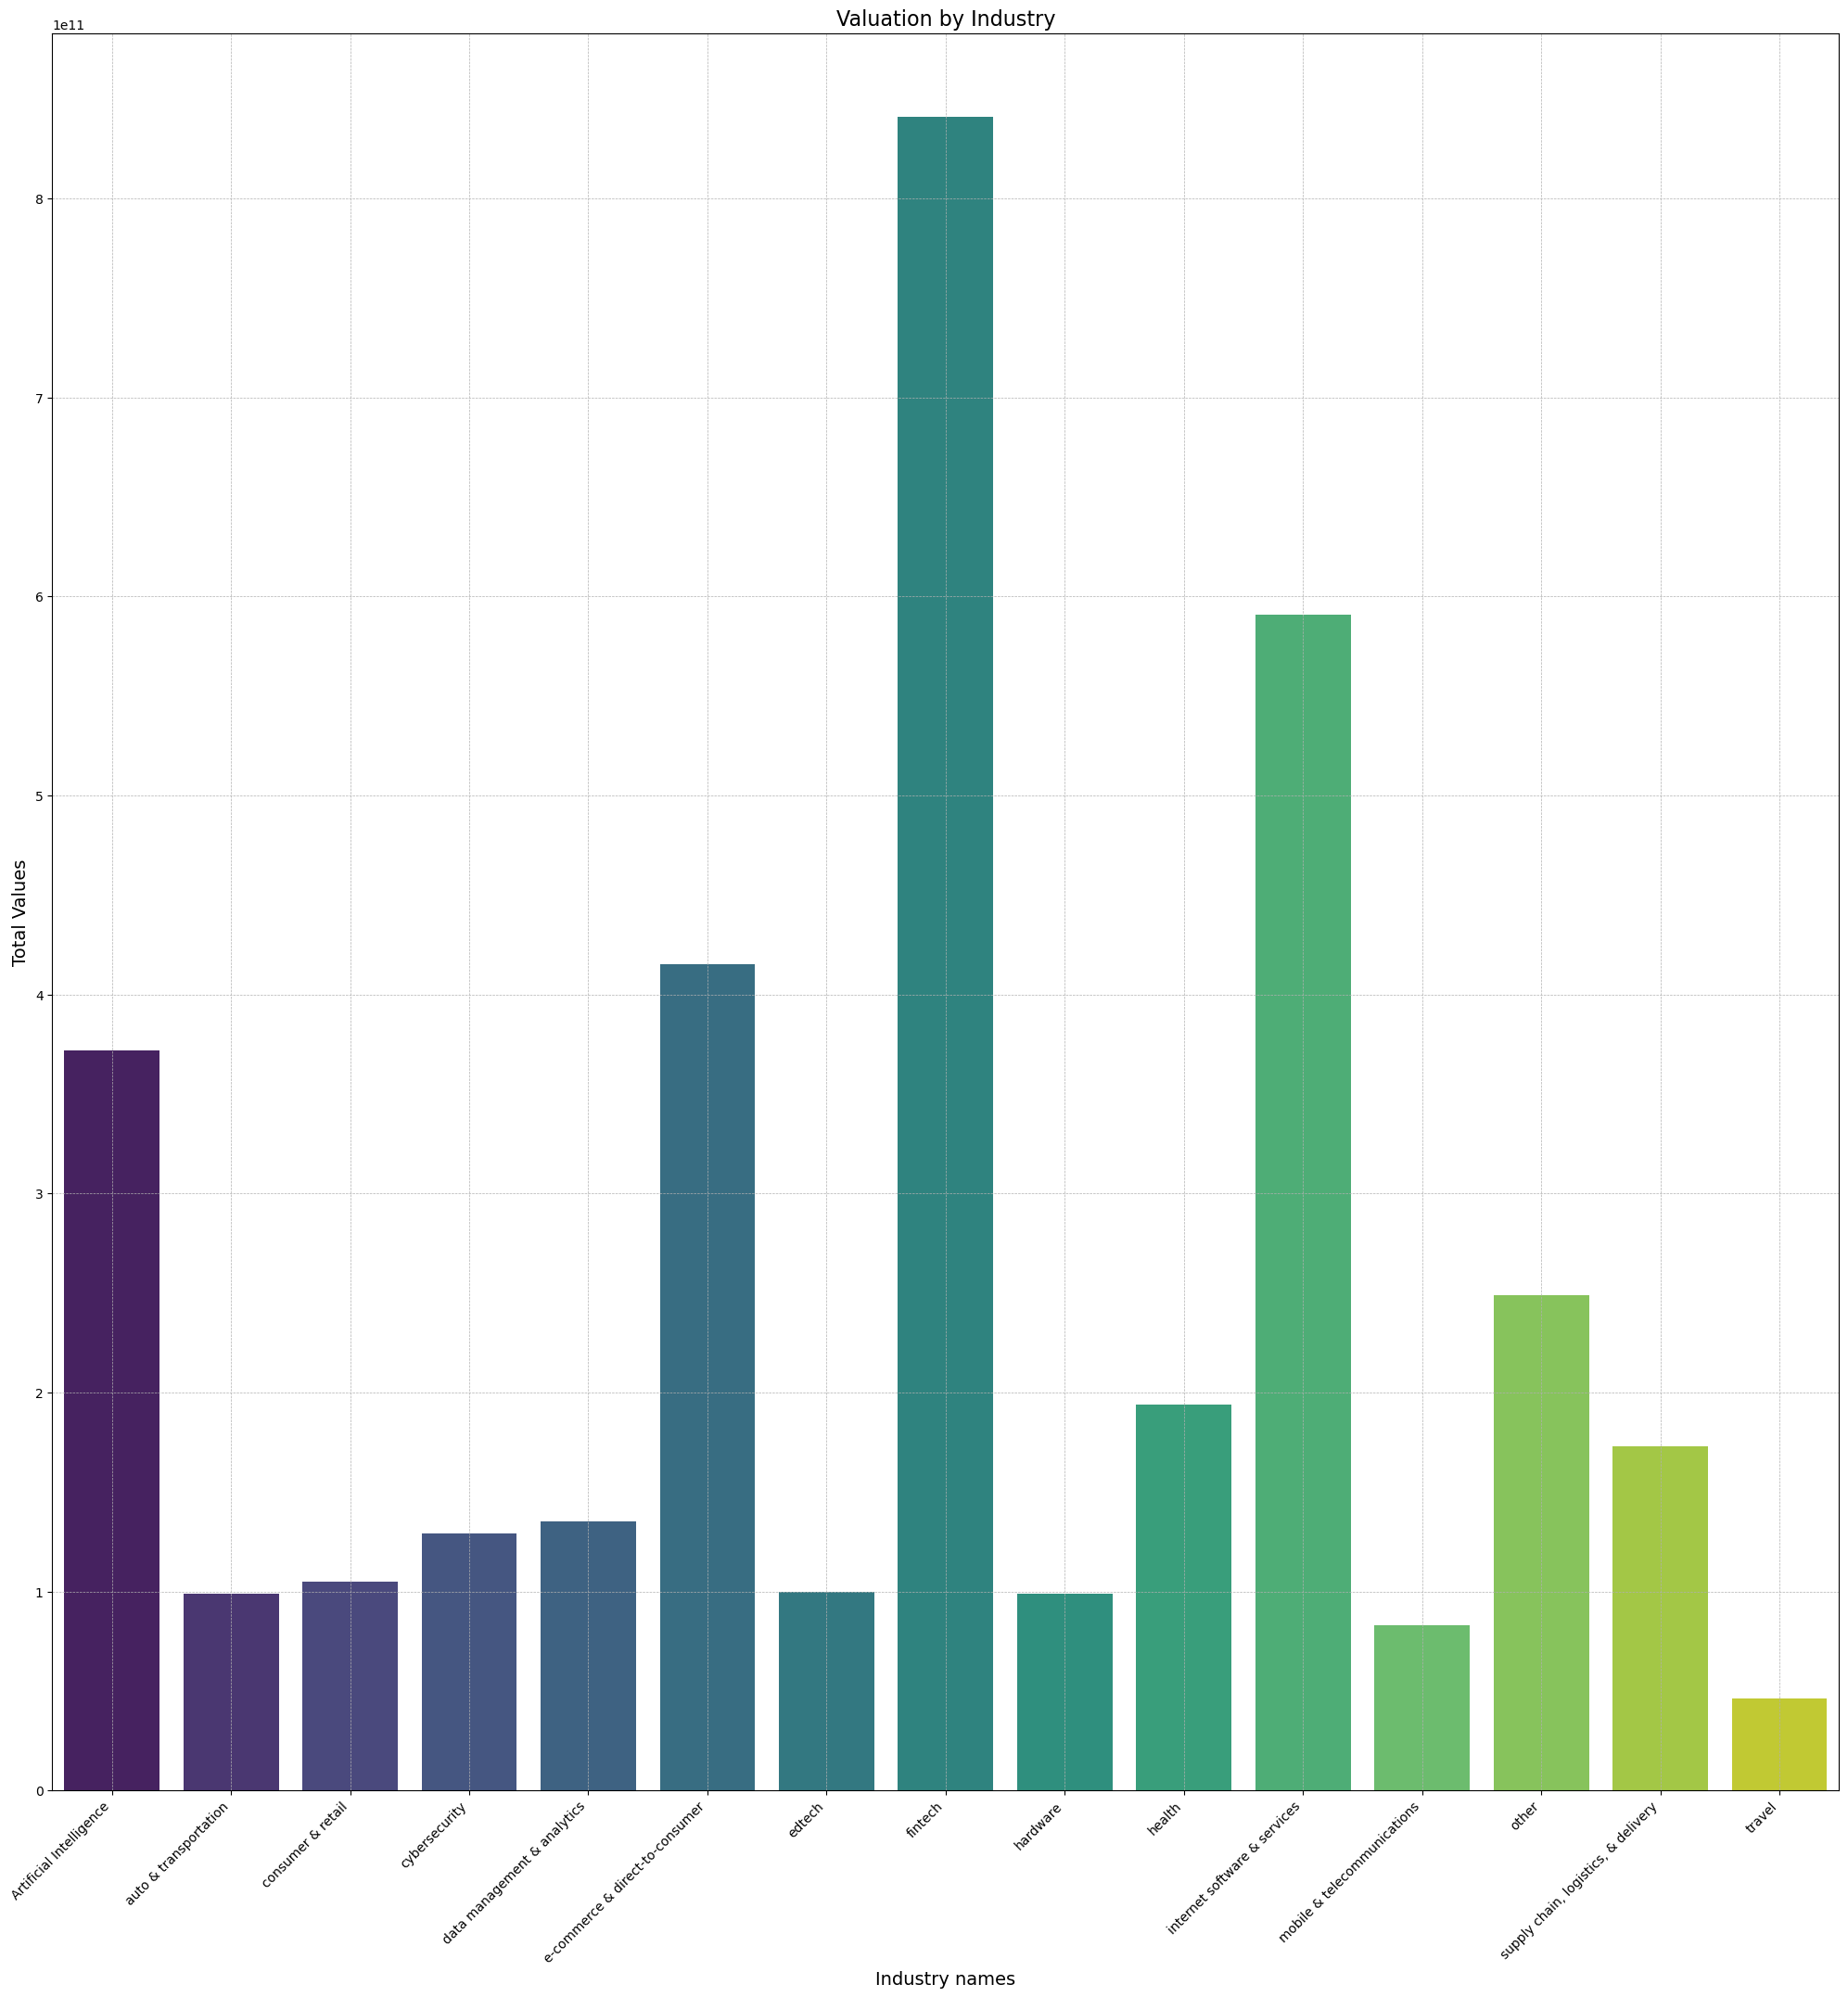

In [49]:
plt.figure(figsize=(20, 20))
bar = sns.barplot(x= 'Industry', y = 'Valuation2', data = Valuation_by_Industry, palette='viridis', ci = 'none')
plt.title('Valuation by Industry', fontsize=16)
plt.xlabel('Industry names', fontsize=14)
plt.ylabel('Total Values', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')
plt.tight_layout() 
plt.xticks(rotation=45, ha='right')
plt.show()

In [62]:
Valuation_by_year = DF[['Date Joined_year', 'Valuation2', 'Continent']].groupby(['Date Joined_year']).sum().sort_values('Date Joined_year', ascending = False).reset_index()
Valuation_by_year

,Date Joined_year,Valuation2
0,2022,2.000000e+11
1,2021,1.128000e+12
2,2020,3.960000e+11
3,2019,4.520000e+11
4,2018,5.890000e+11
5,2017,3.430000e+11
6,2016,8.500000e+10
7,2015,8.300000e+10
8,2014,1.660000e+11
9,2013,6.000000e+09


In [66]:
Company_count_by_year = DF[['Date Joined_year', 'Company']].groupby(['Date Joined_year']).count().sort_values('Date Joined_year', ascending = False).reset_index()
Company_count_by_year

,Date Joined_year,Company
0,2022,116
1,2021,500
2,2020,106
3,2019,101
4,2018,103
5,2017,42
6,2016,20
7,2015,34
8,2014,13
9,2013,3


C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


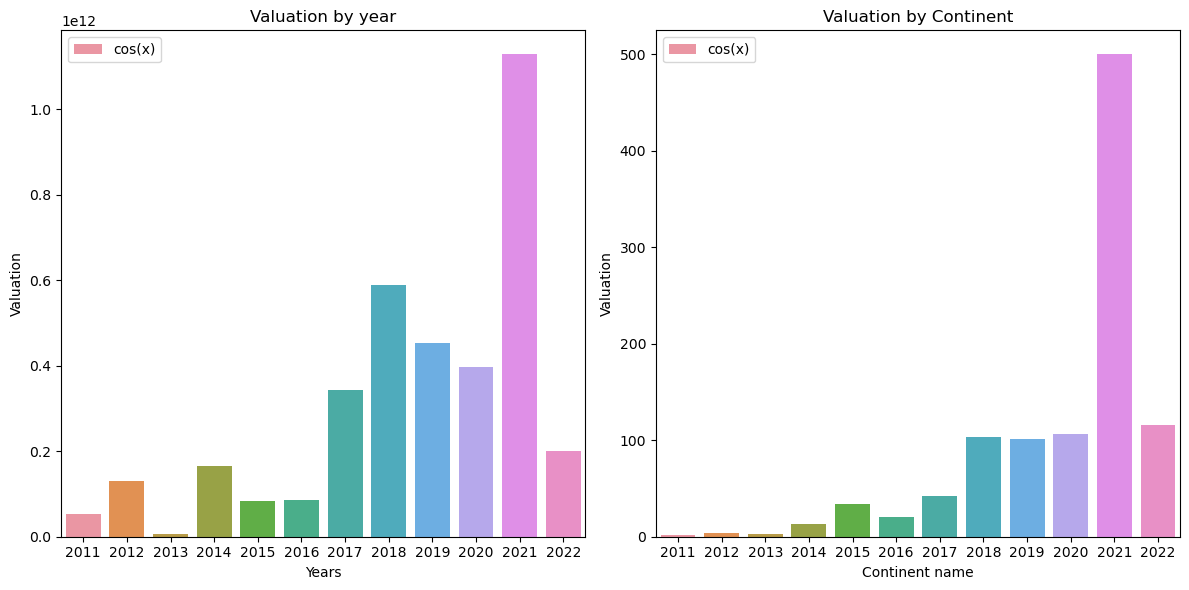

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
sns.barplot(Valuation_by_year['Date Joined_year'], Valuation_by_year['Valuation2'], label='cos(x)', ax = ax1)
ax1.set_title('Valuation by year')
ax1.set_xlabel('Years')
ax1.set_ylabel('Valuation')
ax1.legend()
# İkinci grafiği çizin
sns.barplot(Company_count_by_year['Date Joined_year'], Company_count_by_year['Company'], label='cos(x)', ax = ax2)
ax2.set_title('Valuation by Continent')
ax2.set_xlabel('Continent name')
ax2.set_ylabel('Valuation')
ax2.legend()
plt.tight_layout() 
plt.show()

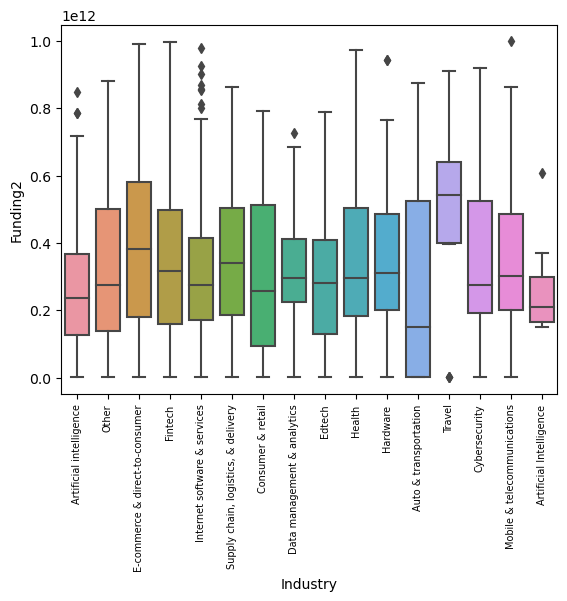

In [73]:

sns.boxplot(data=DF, x = 'Industry', y = 'Funding2')
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [68]:
Top_funded_endustries = DF[['Industry', 'Funding2']].groupby(['Industry']).sum().sort_values('Industry', ascending = False).reset_index()
Top_funded_endustries


,Industry,Funding2
0,travel,6.632000e+12
1,"supply chain, logistics, & delivery",1.944200e+13
2,other,1.806600e+13
3,mobile & telecommunications,1.257100e+13
4,internet software & services,6.309700e+13
5,health,2.595200e+13
6,hardware,1.239400e+13
7,fintech,7.623000e+13
8,edtech,7.889000e+12
9,e-commerce & direct-to-consumer,4.097500e+13


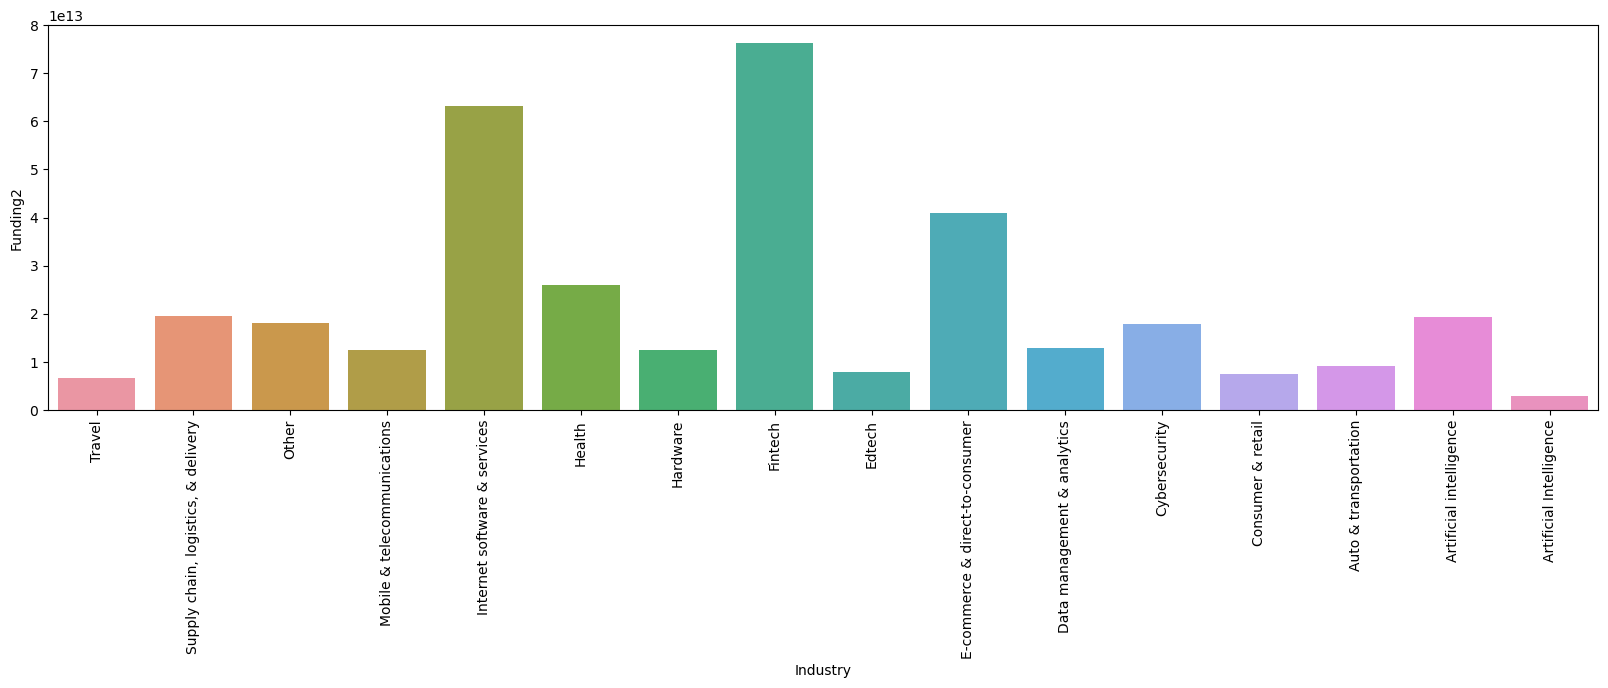

In [74]:
#bunun üzerinde biraz duralım
plt.figure(figsize=(20, 5))
sns.barplot(x = Top_funded_endustries['Industry'], y = Top_funded_endustries['Funding2'])
plt.xticks(rotation=90, fontsize =10)
plt.show()

In [69]:
percentile75 = DF['Valuation2'].quantile(0.95)
percentile25 = DF['Valuation2'].quantile(0.05)
iqr = percentile75 - percentile25
upper = percentile75 + 1.5 * iqr
lower = percentile25 - 1.5 * iqr

In [18]:
def addlabels(x, y, labels):
    for i in range(len(x)):
        if y[i] > upper:
            plt.text(x[i], y[i] + 0.5, s=str(labels[i]), alpha=0.8)

<Figure size 1000x1000 with 0 Axes>

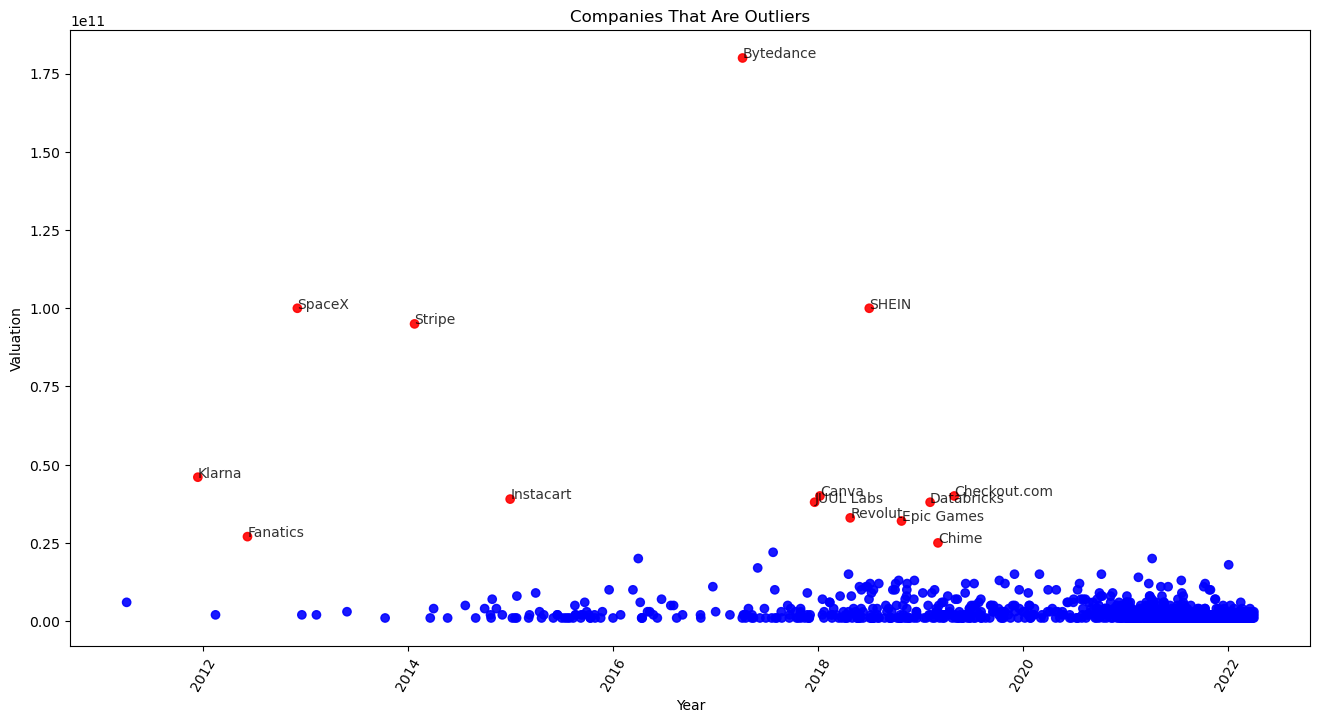

In [20]:
plt.figure(figsize=(10, 10))
colors = np.where(DF['Valuation2'] > upper, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(DF['Date Joined'], DF['Valuation2'], c=colors, alpha = 0.9)
ax.set_xlabel('Year')
ax.set_ylabel('Valuation')
ax.set_title('Companies That Are Outliers')
addlabels(DF['Date Joined'], DF['Valuation2'], DF['Company']) 

for tick in ax.get_xticklabels():
    tick.set_rotation(60)
plt.savefig("grafik9.png", bbox_inches='tight')
plt.show()

In [76]:
outliers =  DF[DF['Valuation2'] > upper].reset_index().sort_values(by = 'Company')
outliers

,level_0,index,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Date Joined_year,Valuation2,Funding2,num_investors2
0,0,0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,1970-01-01 00:00:00.000002012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,1.800000e+11,8.000000e+09,4
5,5,5,Canva,$40B,2018-01-08,internet software & services,Surry Hills,Australia,Oceania,1970-01-01 00:00:00.000002012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,4.000000e+10,5.720000e+11,3
6,6,6,Checkout.com,$40B,2019-05-02,fintech,London,United Kingdom,Europe,1970-01-01 00:00:00.000002012,$2B,"Tiger Global Management, Insight Partners, DST...",2019,4.000000e+10,2.000000e+09,3
13,13,14,Chime,$25B,2019-03-05,fintech,San Francisco,United States,North America,1970-01-01 00:00:00.000002013,$2B,"Forerunner Ventures, Crosslink Capital, Homebrew",2019,2.500000e+10,2.000000e+09,3
9,9,9,Databricks,$38B,2019-02-05,data management & analytics,San Francisco,United States,North America,1970-01-01 00:00:00.000002013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019,3.800000e+10,3.000000e+09,3
11,11,11,Epic Games,$32B,2018-10-26,other,Cary,United States,North America,1970-01-01 00:00:00.000001991,$7B,"Tencent Holdings, KKR, Smash Ventures",2018,3.200000e+10,7.000000e+09,3
12,12,13,Fanatics,$27B,2012-06-06,e-commerce & direct-to-consumer,Jacksonville,United States,North America,1970-01-01 00:00:00.000002002,$4B,"SoftBank Group, Andreessen Horowitz, Temasek H...",2012,2.700000e+10,4.000000e+09,3
7,7,7,Instacart,$39B,2014-12-30,"supply chain, logistics, & delivery",San Francisco,United States,North America,1970-01-01 00:00:00.000002012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014,3.900000e+10,3.000000e+09,3
8,8,8,JUUL Labs,$38B,2017-12-20,consumer & retail,San Francisco,United States,North America,1970-01-01 00:00:00.000002015,$14B,Tiger Global Management,2017,3.800000e+10,1.400000e+10,1
4,4,4,Klarna,$46B,2011-12-12,fintech,Stockholm,Sweden,Europe,1970-01-01 00:00:00.000002005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,4.600000e+10,4.000000e+09,3


In [82]:
outliers.pivot_table(index = 'Company', values = ['Valuation2' ,'num_investors2']).sort_values(by = 'num_investors2', ascending = False)

,Valuation2,num_investors2
Company,,
Bytedance,1.800000e+11,4
Canva,4.000000e+10,3
Checkout.com,4.000000e+10,3
Chime,2.500000e+10,3
Databricks,3.800000e+10,3
Epic Games,3.200000e+10,3
Fanatics,2.700000e+10,3
Instacart,3.900000e+10,3
Klarna,4.600000e+10,3


## Investors

In [83]:
investors_exploded = DF[['Company', 'Continent', 'Select Investors', 'Industry', 'Valuation2']].copy()
investors_exploded['investors'] = DF['Select Investors'].str.split(',')
investors_exploded = investors_exploded.explode('investors')
investors_exploded

,Company,Continent,Select Investors,Industry,Valuation2,investors
0,Bytedance,Asia,"Sequoia Capital China, SIG Asia Investments, S...",Artificial Intelligence,1.800000e+11,Sequoia Capital China
0,Bytedance,Asia,"Sequoia Capital China, SIG Asia Investments, S...",Artificial Intelligence,1.800000e+11,SIG Asia Investments
0,Bytedance,Asia,"Sequoia Capital China, SIG Asia Investments, S...",Artificial Intelligence,1.800000e+11,Sina Weibo
0,Bytedance,Asia,"Sequoia Capital China, SIG Asia Investments, S...",Artificial Intelligence,1.800000e+11,Softbank Group
1,SpaceX,North America,"Founders Fund, Draper Fisher Jurvetson, Rothen...",other,1.000000e+11,Founders Fund
...,...,...,...,...,...,...
1055,Zopa,Europe,"IAG Capital Partners, Augmentum Fintech, North...",fintech,1.000000e+09,Augmentum Fintech
1055,Zopa,Europe,"IAG Capital Partners, Augmentum Fintech, North...",fintech,1.000000e+09,Northzone Ventures
1056,Zwift,North America,"Novator Partners, True, Causeway Media Partners",e-commerce & direct-to-consumer,1.000000e+09,Novator Partners
1056,Zwift,North America,"Novator Partners, True, Causeway Media Partners",e-commerce & direct-to-consumer,1.000000e+09,True


In [30]:
investors_exploded[['Industry' ,'investors']].groupby('Industry').count().sort_values(by = 'investors', ascending = False)

,investors
Industry,
Fintech,625
Internet software & services,575
E-commerce & direct-to-consumer,303
Health,208
Artificial intelligence,199
"Supply chain, logistics, & delivery",165
Cybersecurity,149
Other,141
Data management & analytics,117


In [1023]:
DF.pivot_table(index = 'Industry', columns = 'Continent', values = 'Valuation2')

Continent,Africa,Asia,Europe,North America,Oceania,South America
Industry,,,,,,
Artificial Intelligence,NaN,9.166667e+09,1.500000e+09,2.836735e+09,NaN,1.333333e+09
auto & transportation,NaN,3.150000e+09,3.142857e+09,3.500000e+09,NaN,NaN
consumer & retail,NaN,3.666667e+09,1.500000e+09,5.800000e+09,NaN,NaN
cybersecurity,NaN,2.428571e+09,3.000000e+09,2.595238e+09,NaN,NaN
data management & analytics,NaN,1.250000e+09,3.666667e+09,3.600000e+09,NaN,NaN
e-commerce & direct-to-consumer,NaN,4.540000e+09,3.058824e+09,3.781250e+09,1.000000e+09,2.800000e+09
edtech,NaN,3.947368e+09,3.000000e+09,2.750000e+09,NaN,NaN
fintech,2.000000e+09,2.687500e+09,5.382979e+09,3.724409e+09,4.500000e+09,2.666667e+09
hardware,NaN,3.111111e+09,3.400000e+09,2.363636e+09,NaN,NaN


In [39]:
cross = pd.crosstab(DF['Industry'], DF['Continent']).sort_values(ascending = False, by = 'Industry')
cross

Continent,Africa,Asia,Europe,North America,Oceania,South America
Industry,,,,,,
travel,0,7,5,2,0,0
"supply chain, logistics, & delivery",0,25,6,20,0,4
other,0,13,11,30,0,2
mobile & telecommunications,1,16,5,12,0,1
internet software & services,0,29,15,152,5,0
health,0,15,7,51,0,0
hardware,0,18,5,11,0,0
fintech,2,32,47,127,2,6
edtech,0,19,1,8,0,0


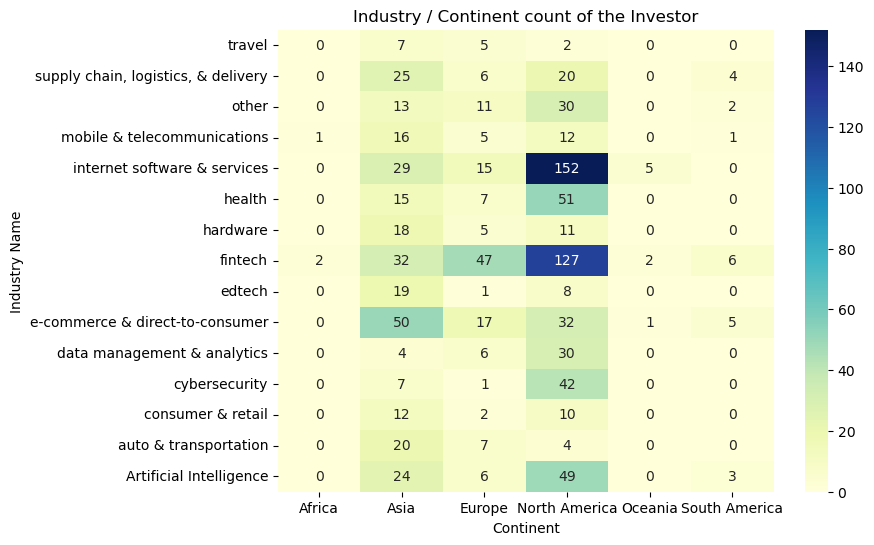

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Industry / Continent count of the Investor')
plt.xlabel('Continent')
plt.ylabel('Industry Name')
plt.savefig('crosstab_heatmap.png', bbox_inches='tight')
plt.show()

In [87]:
investors_exploded['investors'].value_counts().head(20)

 Tiger Global Management        39
 Accel                          31
 Sequoia Capital                30
Sequoia Capital China           28
Andreessen Horowitz             28
Accel                           28
 Insight Partners               24
 Andreessen Horowitz            24
 General Catalyst               23
Insight Partners                22
 SoftBank Group                 21
 Lightspeed Venture Partners    21
 General Atlantic               19
 Google Ventures                19
 Index Ventures                 18
 Sequoia Capital China          17
 Tencent Holdings               17
 Coatue Management              16
New Enterprise Associates       16
 IDG Capital                    16
Name: investors, dtype: int64

In [986]:
Q1 = DF['Valuation2'].quantile(0.05)
Q3 = DF['Valuation2'].quantile(0.95)

# IQR'yi Hesaplama
IQR = Q3 - Q1

# Alt ve Üst Sınırları Belirleme
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ları Belirleme
outliers = DF[(DF['Valuation2'] < lower_bound) | (DF['Valuation2'] > upper_bound)]

# Outlier'ları Temizleme
DF_clean = DF[(DF['Valuation2'] >= lower_bound) & (DF['Valuation2'] <= upper_bound)]

In [660]:
DF['num_investors2'] = DF['Select Investors'].str.count(',') + 1

In [661]:
DF['Valuation3'] = DF['Valuation2'].apply(lambda x: 'high' if x > 1500000000 else 'low')

In [662]:
DF['Valuation_numeric'] = DF['Valuation3'].map({'low': 0, 'high': 1})

In [663]:
DF = pd.get_dummies(DF, columns=['Continent'], drop_first=True)

In [665]:
X = DF.drop(['index', 'Valuation_numeric', 'Valuation3','Valuation', 'Funding', 'Company', 'City', 'Select Investors', 'Year Founded', 'Date Joined', 'Valuation2', 'Select Investors', 'Country/Region', 'Industry'], axis=1)
y = DF['Valuation_numeric']

In [666]:
X.head(2)

,Date Joined_year,num_investors2,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2017,4,1,0,0,0,0
1,2012,3,0,0,1,0,0


In [667]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [668]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [669]:
CLF = LogisticRegression(max_iter=500).fit(X_train, y_train)

In [670]:
CLF.coef_

array([[-1.73222156e-05,  4.69782766e-02, -2.71090334e-01,
         3.71179273e-03,  2.46395797e-01, -2.41286855e-03,
         1.83988767e-02]])

In [672]:
CLF.intercept_

array([0.0005074])

In [673]:
CLF.score(X_test, y_test)

0.5943396226415094

In [674]:
y_pred = CLF.predict(X_test)

In [675]:
CLF.predict(X_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [624]:
CLF.predict_proba(X_test)[::, -1]

array([0.55201871, 0.55201872, 0.55178875, 0.5519676 , 0.5519676 ,
       0.55204426, 0.5520443 , 0.55191653, 0.55189091, 0.55201874,
       0.55196763, 0.55194204, 0.55201872, 0.55201875, 0.55204429,
       0.55204429, 0.55201875, 0.55201871, 0.55199319, 0.55204429,
       0.55194207, 0.55194209, 0.55201873, 0.55201874, 0.55199312,
       0.55201873, 0.55201874, 0.55196763, 0.55201874, 0.5519165 ,
       0.55201874, 0.55199316, 0.55194205, 0.55204429, 0.55201872,
       0.55201875, 0.55201874, 0.55201875, 0.55201874, 0.55204428,
       0.55186539, 0.55201868, 0.55194202, 0.55201874, 0.55196761,
       0.55201871, 0.5519676 , 0.55199318, 0.55204427, 0.55199319,
       0.55191653, 0.55201873, 0.55201869, 0.55191647, 0.55194209,
       0.5519165 , 0.5520443 , 0.55201873, 0.55201874, 0.55201871,
       0.55201875, 0.55194207, 0.55194205, 0.55199319, 0.55194201,
       0.55196764, 0.55204429, 0.55194208, 0.5519165 , 0.55201872,
       0.55201874, 0.55201872, 0.55201874, 0.551942  , 0.55201

In [625]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = CLF.classes_)

In [626]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= CLF.classes_)

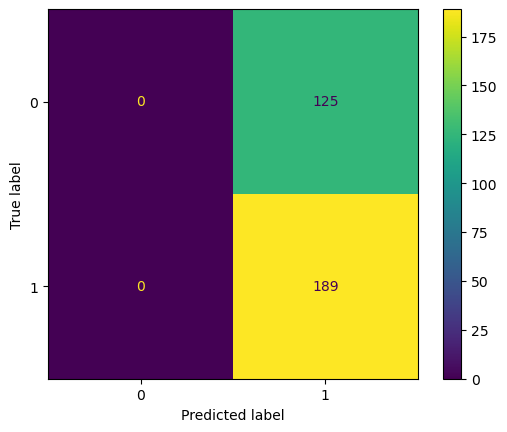

In [627]:
disp.plot()

In [676]:
print('\t\t\tTest Skoru: {}'.format(CLF.score(X_test, y_test)))
print(classification_report(y_test, CLF.predict(X_test)))

print('\t\t======================================')

print()
print('\t\t\tEğitim Skoru: {}'.format(CLF.score(X_train, y_train)))
print(CLF.score(X_train, y_train))
print(classification_report(y_train, CLF.predict(X_train)))

			Test Skoru: 0.5943396226415094
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       122
           1       0.65      0.73      0.69       196

    accuracy                           0.59       318
   macro avg       0.56      0.55      0.55       318
weighted avg       0.58      0.59      0.58       318


			Eğitim Skoru: 0.5696887686062246
0.5696887686062246
              precision    recall  f1-score   support

           0       0.55      0.32      0.40       339
           1       0.58      0.78      0.66       400

    accuracy                           0.57       739
   macro avg       0.56      0.55      0.53       739
weighted avg       0.57      0.57      0.54       739



In [512]:
print(CLF.summary())

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [257]:
import statsmodels.api as sm

In [905]:
model = sm.OLS(y, X)
result = model.fit()


In [906]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      Valuation_numeric   R-squared (uncentered):                   0.561
Model:                            OLS   Adj. R-squared (uncentered):              0.559
Method:                 Least Squares   F-statistic:                              221.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                   1.45e-181
Time:                        09:11:40   Log-Likelihood:                         -746.19
No. Observations:                1043   AIC:                                      1504.
Df Residuals:                    1037   BIC:                                      1534.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [886]:
X.head(2)

,num_investors2,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
14,3,1,0,0,0,0
15,3,1,0,0,0,0


In [987]:
DF_clean['num_investors2'] = DF_clean['Select Investors'].str.count(',') + 1

DF_clean['Valuation3'] = DF_clean['Valuation2'].apply(lambda x: 'high' if x > 1500000000 else 'low')

DF_clean['Valuation_numeric'] = DF_clean['Valuation3'].map({'low': 0, 'high': 1})



C:\Users\Pc\AppData\Local\Temp\ipykernel_10864\3333777800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_clean['num_investors2'] = DF_clean['Select Investors'].str.count(',') + 1
C:\Users\Pc\AppData\Local\Temp\ipykernel_10864\3333777800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_clean['Valuation3'] = DF_clean['Valuation2'].apply(lambda x: 'high' if x > 1500000000 else 'low')
C:\Users\Pc\AppData\Local\Temp\ipykernel_10864\3333777800.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [949]:
DF_clean = pd.get_dummies(DF_clean, columns=['Continent', 'Industry'], drop_first=True)

In [992]:
X = DF_clean.drop(['index', 'Valuation_numeric', 'Valuation3','Valuation', 'Company', 'City', 'Select Investors', 'Year Founded', 'Date Joined', 'Valuation2', 'Select Investors', 'Country/Region', 'Funding', 'Industry', 'Continent'], axis=1)
y = DF_clean['Valuation_numeric']

In [993]:
X.head(1)

,Funding2,num_investors2
14,4.000000e+09,3


In [994]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [995]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [996]:
CLF = LogisticRegression(max_iter=500).fit(X_train, y_train)

In [997]:
CLF.coef_

array([[ 1.07375904e-12, -1.28900503e-24]])

In [998]:
CLF.intercept_

array([-4.1670343e-25])

In [1000]:
CLF.score(X_test, y_test)


0.5760517799352751

In [1001]:
y_pred = CLF.predict(X_test)

In [1002]:
CLF.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [1003]:
CLF.predict_proba(X_test)[::, -1]

array([0.50080532, 0.60882807, 0.62153689, 0.50053688, 0.57958109,
       0.60035744, 0.55586963, 0.6039587 , 0.70647705, 0.6083165 ,
       0.57512687, 0.56644615, 0.50026844, 0.70825519, 0.6305861 ,
       0.56063592, 0.64840662, 0.63904921, 0.56486328, 0.54044584,
       0.5837615 , 0.56327909, 0.69681214, 0.64889604, 0.62405937,
       0.58740953, 0.50053688, 0.55480902, 0.55825412, 0.53510774,
       0.55825412, 0.62481481, 0.54417706, 0.5481693 , 0.642016  ,
       0.68927439, 0.6300857 , 0.50402651, 0.60113007, 0.55029599,
       0.60267381, 0.5343063 , 0.68743163, 0.59312265, 0.7179206 ,
       0.69225611, 0.55639974, 0.56142924, 0.57276376, 0.56433536,
       0.56354321, 0.61494791, 0.65280011, 0.55507422, 0.53804477,
       0.50026844, 0.60754871, 0.59026913, 0.56697347, 0.55639974,
       0.546307  , 0.58088872, 0.72030635, 0.68604565, 0.57223817,
       0.64053394, 0.54177896, 0.5928635 , 0.60933939, 0.62128428,
       0.62002024, 0.61240227, 0.54124578, 0.59026913, 0.58141

In [1004]:
print('\t\t\tTest Skoru: {}'.format(CLF.score(X_test, y_test)))
print(classification_report(y_test, CLF.predict(X_test)))

print('\t\t======================================')

print()
print('\t\t\tEğitim Skoru: {}'.format(CLF.score(X_train, y_train)))
print(CLF.score(X_train, y_train))
print(classification_report(y_train, CLF.predict(X_train)))

			Test Skoru: 0.5760517799352751
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.58      1.00      0.73       178

    accuracy                           0.58       309
   macro avg       0.29      0.50      0.37       309
weighted avg       0.33      0.58      0.42       309


			Eğitim Skoru: 0.5547850208044383
0.5547850208044383
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.55      1.00      0.71       400

    accuracy                           0.55       721
   macro avg       0.28      0.50      0.36       721
weighted avg       0.31      0.55      0.40       721



C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [1005]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.657049
         Iterations 5


In [912]:
X1 = sm.add_constant(X)

In [1006]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:      Valuation_numeric   No. Observations:                 1030
Model:                          Logit   Df Residuals:                     1028
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                 0.04171
Time:                        09:26:36   Log-Likelihood:                -676.76
converged:                       True   LL-Null:                       -706.22
Covariance Type:            nonrobust   LLR p-value:                 1.651e-14
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Funding2        2.139e-12   2.92e-13      7.323      0.000    1.57e-12    2.71e-12
num_investors2    -0.1597      0.039     -4.069      0.000      -0.237      -0.083


In [1012]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [1010]:
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)


svm_model.fit(X_train, y_train)



SVC()

In [1016]:
y_pred1 = svm_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

Confusion Matrix:
[[ 87  44]
 [ 40 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       131
           1       0.76      0.78      0.77       178

    accuracy                           0.73       309
   macro avg       0.72      0.72      0.72       309
weighted avg       0.73      0.73      0.73       309



In [1018]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred2 = rf_model.predict(X_test)


In [1019]:


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

Confusion Matrix:
[[ 71  60]
 [ 57 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       131
           1       0.67      0.68      0.67       178

    accuracy                           0.62       309
   macro avg       0.61      0.61      0.61       309
weighted avg       0.62      0.62      0.62       309

